In [1]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
#import data
data = pd.read_csv("C:/Users/Computer/Downloads/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [4]:
data.shape

(30, 2)

In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Visualisation

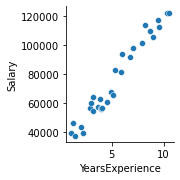

In [9]:
sns.pairplot(y_vars = 'Salary', x_vars = 'YearsExperience' ,data = data)

In [10]:
# checking the correlation of the data
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Data Preparation

In [12]:
X = data['YearsExperience']
y = data['Salary']

In [13]:
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
X_train.shape

(21,)

In [15]:
X_test.shape

(9,)

# Model Building

In [16]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

In [17]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           9.91e-14
Time:                        17:04:25   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387     

In [ ]:
#Salary = 25200 + YearsExperience x9731.2038

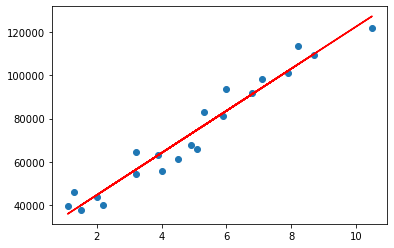

In [18]:
# Let us show the line fitting:
plt.scatter(X_train,y_train)
plt.plot(X_train, 25200 + X_train * 9731.2038,'r')
plt.show()

In [19]:
#residual Analysis
y_train_pred = model.predict(X_train_sm)

In [20]:
y_train_pred.head()

17     76778.268129
22    102079.398108
11     64127.703139
4      46611.536230
29    127380.528088
dtype: float64

In [22]:
residual = (y_train - y_train_pred)

<AxesSubplot:ylabel='Density'>

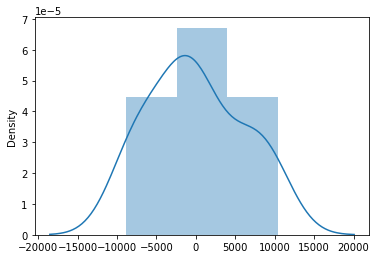

In [23]:
sns.distplot(residual)

<AxesSubplot:xlabel='YearsExperience'>

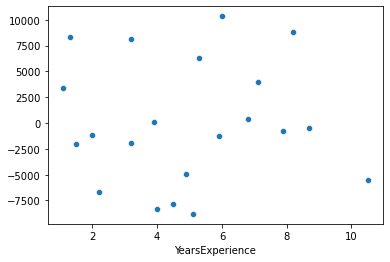

In [24]:
sns.scatterplot(X_train,residual)

# prediction on test data

In [25]:
X_test_sm = sm.add_constant(X_test)

In [26]:
y_pred = model.predict(X_test_sm)

# Root Mean Squared Error

In [28]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE
#RMSE won't suggest anything as we do not have any model to compare.a

5505.479002176126

# R2 Score

In [29]:
r2_score(y_test,y_pred)

0.962766868547327

In [ ]:
# Let us show the line fitting:
plt.scatter(X_test,y_test)
plt.plot(X_test, 25200 + X_test * 9731.2038,'r')
plt.show()